Diagnostics for NR

In [1]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt

from measureEccentricity.measureEccentricity import get_available_methods
from measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform

%load_ext autoreload
%autoreload 2

/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


In [2]:
import glob

In [3]:
sxs_nr_waveforms = glob.glob("../data/ecc_waveforms/Non-Precessing/SXS/BBH_S*.h5")

/home1/md.shaikh/Eccentricity/notebook/../measureEccentricity/eccDefinition.py:456: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


Text(0.5, 1.0, 'q=1.0, ecc=0.09 method=ResidualAmplitude, BBH_SHK_q1_0_0_e02_D22_Res3.h5')

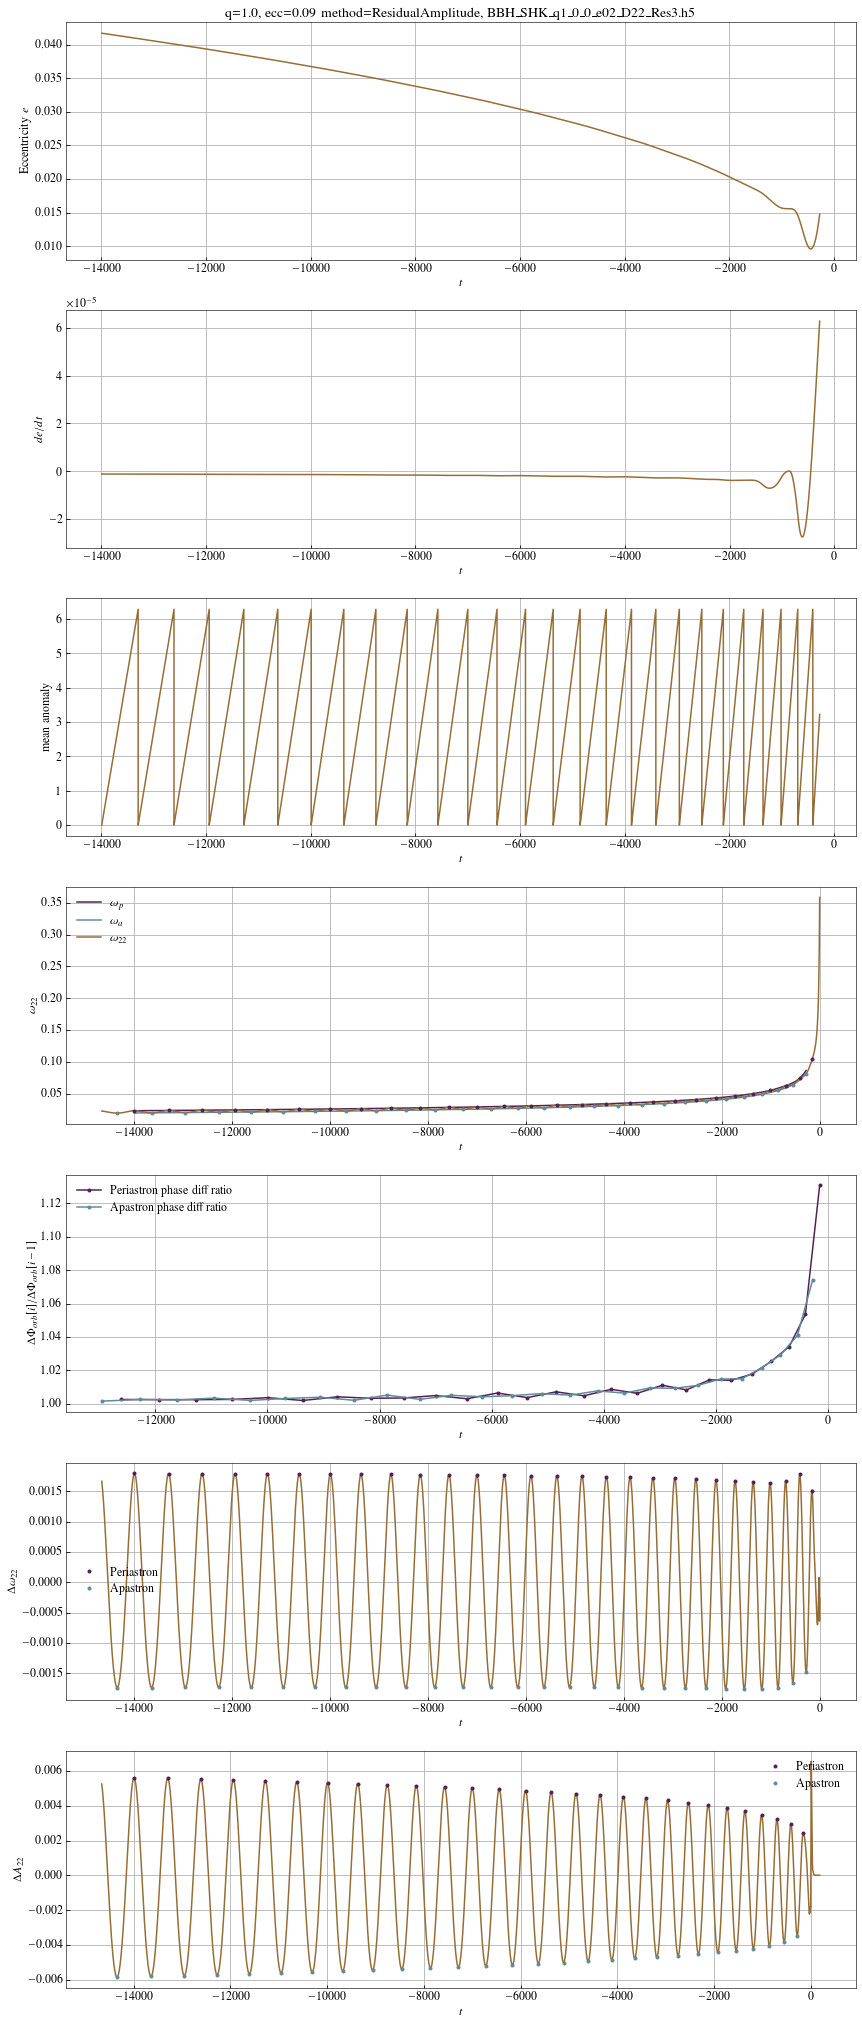

In [8]:
method = "ResidualAmplitude"
waveform_path = sxs_nr_waveforms[15]
kwargs = {"filepath": waveform_path,
         "include_zero_ecc": True}
dataDict = load_waveform("LVCNR", **kwargs)
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method=method, 
                                                                return_ecc_method=True,
                                                                extra_kwargs={"debug": False})
fig, ax = eccMethod.make_diagnostic_plots()
w = waveform_path.split("/")[-1]
q = dataDict["params_dict"]["q"]
ecc = dataDict["params_dict"]["ecc"]
ax[0].set_title(f"q={q:.1f}, ecc={ecc:.2f} method={method}, {w}", fontsize=14)

In [7]:
import h5py

In [17]:
sxs_nr_waveforms[8]

'../data/ecc_waveforms/Non-Precessing/SXS/BBH_SKS_q1_e09_D130_SKS_DoNotControlLEqualsOneShape_Res3.h5'

In [8]:
f = h5py.File(sxs_nr_waveforms[8])

In [19]:
f.attrs["f_lower_at_1MSUN"]

KeyError: "Can't open attribute (can't locate attribute: 'f')"

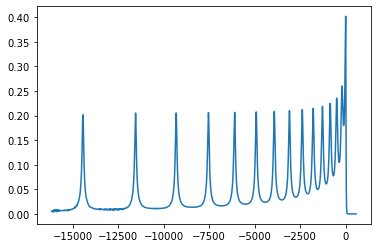

In [16]:
plt.plot(f["amp_l2_m2"]["X"][:], f["amp_l2_m2"]["Y"][:])

### Diagnostic plots for Amplitude method

In [ ]:
method = "Amplitude"
waveform_path = sxs_nr_waveforms[8]
kwargs = {"filepath": waveform_path,
         "include_zero_ecc": False,
         "num_orbits_to_remove_as_junk": 2}
dataDict = load_waveform("LVCNR", **kwargs)
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method=method, 
                                                                return_ecc_method=True,
                                                                extra_kwargs={"debug": False})
fig, ax = eccMethod.make_diagnostic_plots()
w = waveform_path.split("/")[-1]
q = dataDict["params_dict"]["q"]
ecc = dataDict["params_dict"]["ecc"]
ax[0].set_title(f"q={q:.1f}, ecc={ecc:.2f} method={method}, {w}", fontsize=14)

### Loop over all waveforms with Amp

In [4]:
from tqdm import tqdm

In [ ]:
method = "ResidualAmplitude"
for waveform_path in tqdm(sxs_nr_waveforms[34:]):
    kwargs = {"filepath": waveform_path,
             "include_zero_ecc": True,
             "num_orbits_to_remove_as_junk": 2}
    dataDict = load_waveform("LVCNR", **kwargs)
    tref_vec = dataDict["t"]
    tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(
        tref_in=tref_vec,
        dataDict=dataDict,
        method=method, 
        return_ecc_method=True,
        extra_kwargs={"debug": False})
    fig, ax = eccMethod.make_diagnostic_plots()
    w = waveform_path.split("/")[-1]
    q = dataDict["params_dict"]["q"]
    ecc = dataDict["params_dict"]["ecc"]
    ax[0].set_title(f"q={q:.1f}, ecc={ecc:.2f} method={method}, {w}", fontsize=14)

  0%|                                                                                                                                                                                       | 0/27 [00:00<?, ?it/s]